In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

# metadata
print(cervical_cancer_risk_factors.metadata)

# variable information
print(cervical_cancer_risk_factors.variables)


{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

In [ ]:
X

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
y

**Since Y returns no value, we will not concatenate our data**


---



In [ ]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [145]:
data = X
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,1.0,1.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,1.0,1.0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

**The number of NaN Values Per Column**

In [147]:
missing_values = data.isnull().sum() #checking the total number of NaN Values per Column
missing_values

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


**Unique values of each column**

In [148]:
for columns in data:
  print(columns)
  print(data[columns].unique()) #checking and printing all the unqiue values of each column
  print('-----')

Age
[18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
-----
Number of sexual partners
[ 4.  1.  5.  3.  2.  6.  7. 15.  8. 10. 28.  9.]
-----
First sexual intercourse
[15. 14. 16. 21. 23. 17. 26. 20. 25. 18. 27. 19. 24. 32. 13. 29. 11. 12.
 22. 28. 10.]
-----
Num of pregnancies
[ 1.  4.  2.  6.  3.  5.  8.  7.  0. 11. 10.]
-----
Smokes
[0. 1.]
-----
Smokes (years)
[ 0.         37.         34.          1.26697291  3.         12.
 18.          7.         19.         21.         15.         13.
 16.          8.          4.         10.         22.         14.
  0.5        11.          9.          2.          5.          6.
  1.         32.         24.         28.         20.          0.16      ]
-----
Smokes (packs/year)
[0.00000000e+00 3.70000000e+01 3.40000000e+00 2.80000000e+00
 4.00000000e-02 5.13202128e-01 2.40000000e+00 6.00000000e+00
 9.00000000e+00 1.60000000e+00 1.90000000e+01 2.10000000e+01
 3.20

**STDs: Time since first diagnosis and STDs: Time since last diagnosis have to much NaN values, we cannot just imputate its missing data so it will be better to drop those columns**

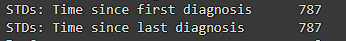

In [149]:
data = data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1) #dropping the column
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

**The Column STDs: AIDS and STDs:cervical condylomatosis only have NaNs and 0s, we are going to drop it**

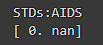

In [150]:
data = data.drop(columns = ['STDs:AIDS', 'STDs:cervical condylomatosis']) #dropping unecessary columns
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

**Most of our columns that have missing values are dichotomous variable, which means they only have 2 levels of values which is 'Yes' or 'No', in this case we have '0' or '1', so instead of mean imputation, we are going with mode imputation for the NaN values.**

**The rest of are columns are in Interval Level of measurement, they cannot have vaues with decimals, only whole numbers that's why mode imputation is also used**

In [151]:
for x in data:
  data[x] = data[x].fillna(data[x].mode()[0]) #mode imputation

In [152]:
nan_values = data.isnull().sum() #checking again for null values
nan_values

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
Dx:Cancer                             0


In [153]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [154]:
data.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:HIV                              float64
STDs:Hepatitis B                  

**Correlation of each column using heatmap**

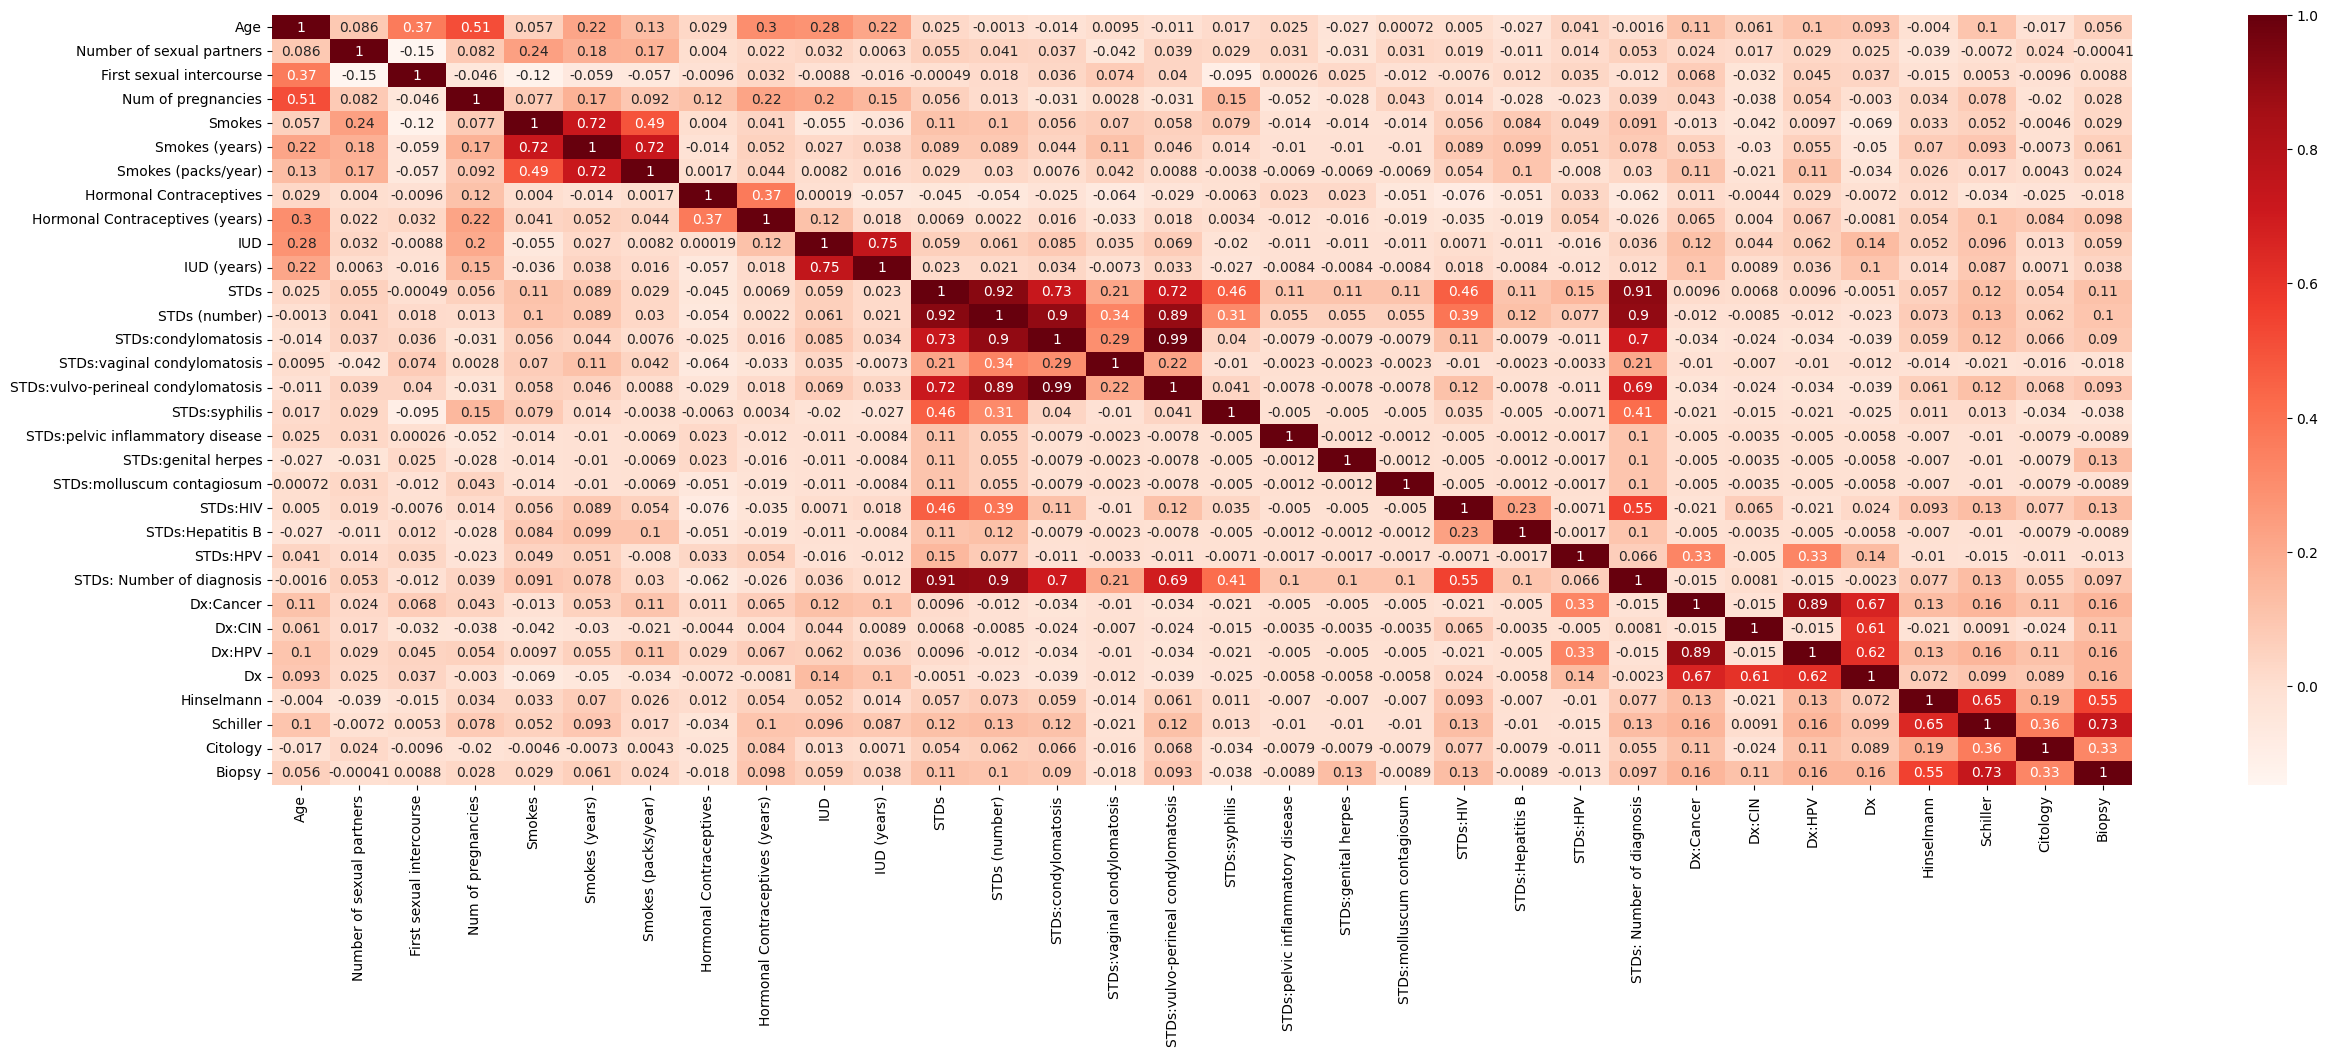

In [155]:
plt.figure(figsize = (30,10))
ax = sns.heatmap(data.corr(), annot = True, cmap = 'Reds')

In [272]:
data.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085971,0.365248,0.514977,0.057204,0.218261,0.131861,0.029201,0.298892,0.279429,...,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085971,1.000000,-0.147280,0.082388,0.236858,0.175729,0.174968,0.004027,0.021525,0.032460,...,0.014360,0.053056,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
First sexual intercourse,0.365248,-0.147280,1.000000,-0.046099,-0.123017,-0.058620,-0.057013,-0.009563,0.031976,-0.008826,...,0.034938,-0.011617,0.067996,-0.031960,0.044727,0.036664,-0.015311,0.005275,-0.009594,0.008771
Num of pregnancies,0.514977,0.082388,-0.046099,1.000000,0.077363,0.172084,0.092214,0.116944,0.221456,0.198134,...,-0.023343,0.039195,0.042765,-0.037752,0.054111,-0.003034,0.033987,0.077526,-0.020131,0.027959
Smokes,0.057204,0.236858,-0.123017,0.077363,1.000000,0.723572,0.493843,0.004036,0.040917,-0.055115,...,0.049193,0.090725,-0.013470,-0.042119,0.009737,-0.069396,0.033333,0.052028,-0.004639,0.028724
Smokes (years),0.218261,0.175729,-0.058620,0.172084,0.723572,1.000000,0.724320,-0.013888,0.052436,0.027492,...,0.051201,0.078303,0.052859,-0.030476,0.055398,-0.050213,0.070352,0.093479,-0.007275,0.061204
Smokes (packs/year),0.131861,0.174968,-0.057013,0.092214,0.493843,0.724320,1.000000,0.001713,0.043803,0.008226,...,-0.008015,0.029912,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
Hormonal Contraceptives,0.029201,0.004027,-0.009563,0.116944,0.004036,-0.013888,0.001713,1.000000,0.370696,0.000188,...,0.032666,-0.062199,0.011278,-0.004397,0.028808,-0.007245,0.012360,-0.034002,-0.025116,-0.018015
Hormonal Contraceptives (years),0.298892,0.021525,0.031976,0.221456,0.040917,0.052436,0.043803,0.370696,1.000000,0.115456,...,0.054142,-0.025662,0.064993,0.003972,0.066509,-0.008054,0.054264,0.101250,0.084429,0.097937
IUD,0.279429,0.032460,-0.008826,0.198134,-0.055115,0.027492,0.008226,0.000188,0.115456,1.000000,...,-0.015819,0.035791,0.117166,0.043708,0.062142,0.135778,0.052108,0.096089,0.013292,0.059231


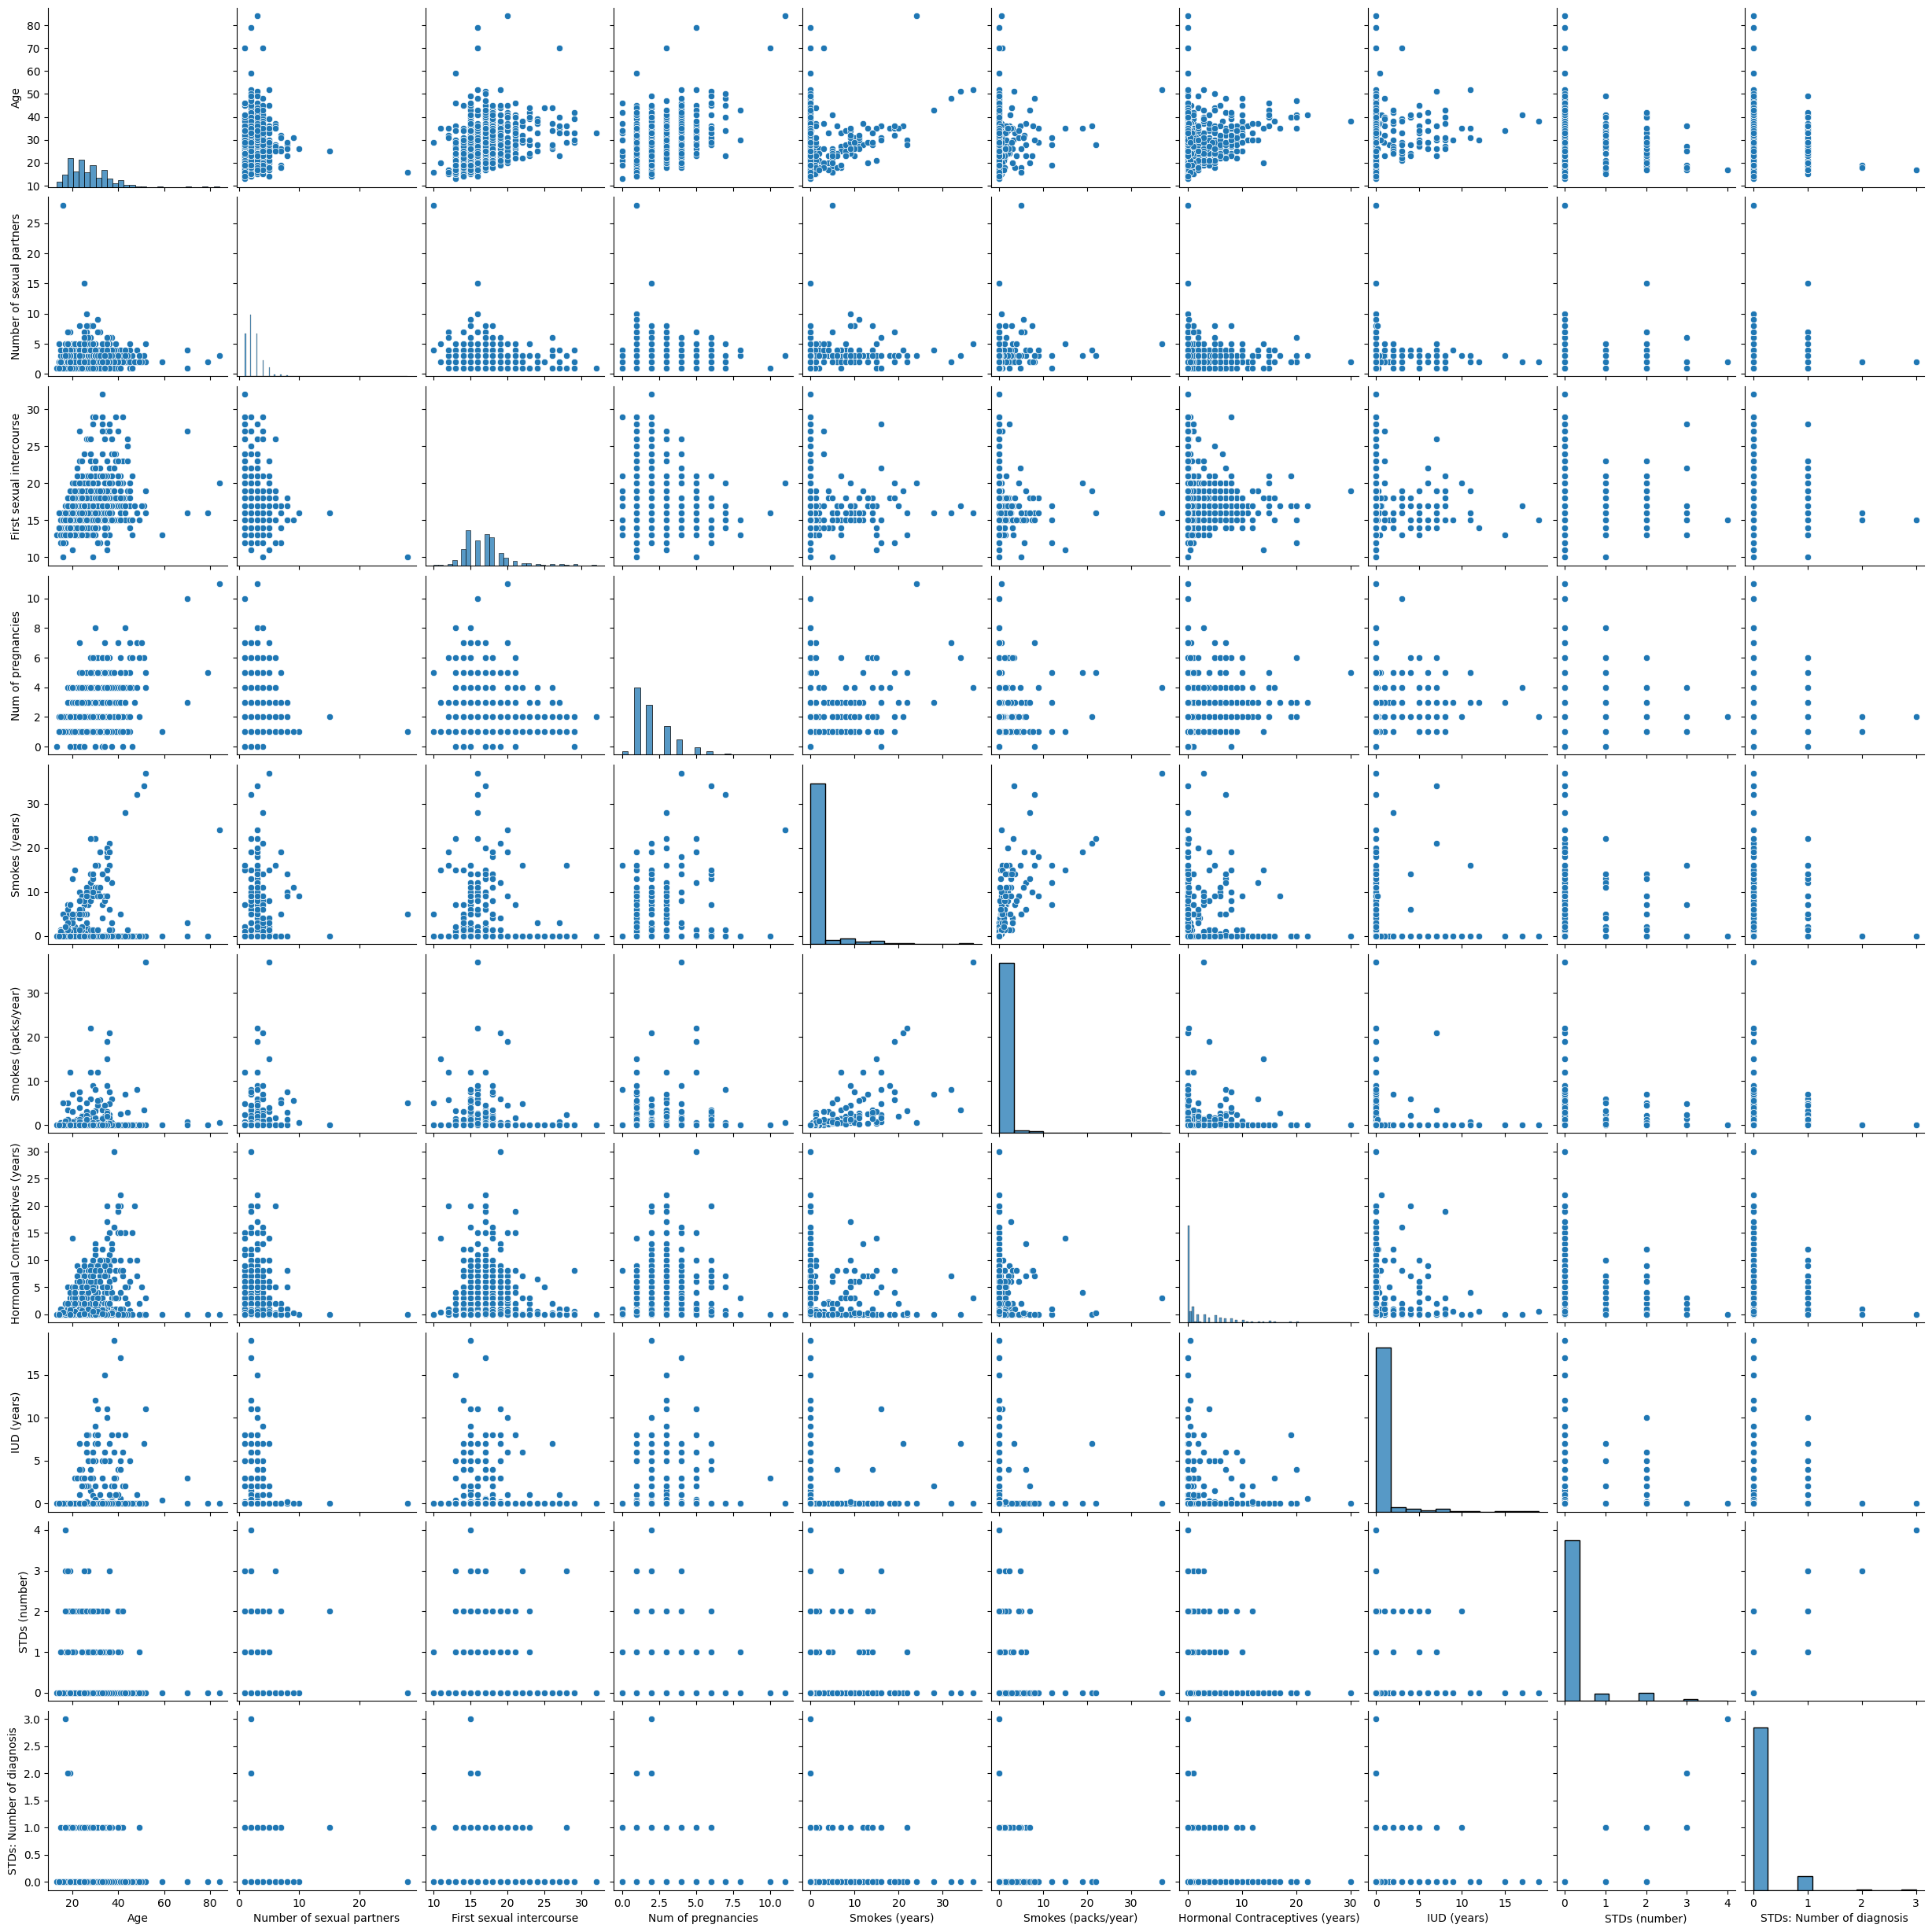

In [112]:
sns.pairplot(data)

**According to our dataset, we can use the 'Hinselmann', 'Schiller', 'Biopsy', and 'Citology' as target variable, so we can use it for our y in our model, for our x, and since our Dataset focuses on cancer, we will have Dx:Cancer for our x variable**

In [262]:
X_1 = data.drop('Hinselmann', axis=1)
y_1 = data['Hinselmann']


In [263]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=102)


In [264]:
model = LogisticRegression()

model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**CLASSIFICATION REPORT**

In [265]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
print(classification_report(y_test, predictions, target_names = ['with cancer', 'without cancer']))

0.9651162790697675
                precision    recall  f1-score   support

   with cancer       0.98      0.98      0.98       250
without cancer       0.44      0.50      0.47         8

      accuracy                           0.97       258
     macro avg       0.71      0.74      0.73       258
  weighted avg       0.97      0.97      0.97       258



**PREDICTIONS**

In [266]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [271]:
sample_number = 0

for x in predictions:
  sample_number +=1
  if x == 1:
    print('According to Model predictions, Sample No.', sample_number, 'will have cancer by using the Hinselmann Instrument')



According to Model predictions, Sample No. 5 will have cancer by using the Hinselmann Instrument
According to Model predictions, Sample No. 33 will have cancer by using the Hinselmann Instrument
According to Model predictions, Sample No. 62 will have cancer by using the Hinselmann Instrument
According to Model predictions, Sample No. 71 will have cancer by using the Hinselmann Instrument
According to Model predictions, Sample No. 84 will have cancer by using the Hinselmann Instrument
According to Model predictions, Sample No. 131 will have cancer by using the Hinselmann Instrument
According to Model predictions, Sample No. 194 will have cancer by using the Hinselmann Instrument
According to Model predictions, Sample No. 213 will have cancer by using the Hinselmann Instrument
According to Model predictions, Sample No. 216 will have cancer by using the Hinselmann Instrument




---


**Conclusion**

• In this activity, we tried to create a classification using Logistic regression to our given dataset, our dataset contains different habits of the population including some of their personal information. I tried creating a model to predict whether our sample will have a cancer or not using a certain equipment instrument, in this case, I used the Hinselmann as my test variable.


In [277]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
